In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv("traffic-collision-data-from-2010-to-present.csv")

In [5]:
data.columns.values

array(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description', 'Address',
       'Cross Street', 'Location', 'Zip Codes', 'Census Tracts',
       'Precinct Boundaries', 'LA Specific Plans', 'Council Districts',
       'Neighborhood Councils (Certified)'], dtype=object)

In [6]:
#CLEANING DATA. Filling in Victim's age with average age.
mean_age = data['Victim Age'].mean()
data['Victim Age'].fillna(mean_age, inplace = True)
data['Date Occurred'].replace(regex=True,inplace=True,to_replace=r'T00:00:00.000',value=r'')
#replace H,N with X because all are unknown
data['Victim Sex'] = data['Victim Sex'].replace(['H', 'N',''], 'X')
#get hour of time instead of by minute
data['Time (hour)'] = data['Time Occurred'].floordiv(100)

In [113]:
#Determining Time occurred and victim age relationship
#What age are those in most traffic accidents?
data['Victim Age'].value_counts()
#data[['Date Occurred', 'Time Occurred', 'Victim Age']][:20]

41.547139    77546
30.000000    14048
25.000000    13111
24.000000    11577
27.000000    11494
28.000000    11419
26.000000    11334
40.000000    11292
35.000000    11255
23.000000    11194
50.000000    10767
29.000000    10726
22.000000    10693
31.000000    10099
32.000000     9788
21.000000     9439
33.000000     9267
45.000000     9069
34.000000     8966
20.000000     8723
36.000000     8502
37.000000     8250
38.000000     8142
39.000000     7829
41.000000     7741
42.000000     7647
43.000000     7420
44.000000     7297
46.000000     7261
49.000000     7224
             ...  
78.000000      737
80.000000      626
79.000000      622
81.000000      580
83.000000      466
82.000000      454
84.000000      377
85.000000      333
86.000000      261
87.000000      233
19.000000      222
89.000000      190
88.000000      176
90.000000      158
17.000000      124
91.000000       93
92.000000       81
94.000000       51
95.000000       50
93.000000       47
96.000000       40
16.000000   

In [8]:
#determining what age has most accidents after 8PM
data[data['Time Occurred'] > 2200]['Victim Age'].value_counts()[:20]
#seeing the victim ages of based on accident time sorted by accident time
#data[data['Time Occurred'] > 2000][['Time Occurred', 'Victim Age']].sort_values(['Time Occurred', 'Victim Age'])

41.547139    5970
30.000000    1052
25.000000     959
22.000000     831
27.000000     828
23.000000     818
24.000000     813
26.000000     799
28.000000     766
40.000000     760
50.000000     715
21.000000     711
29.000000     710
20.000000     701
Name: Victim Age, dtype: int64

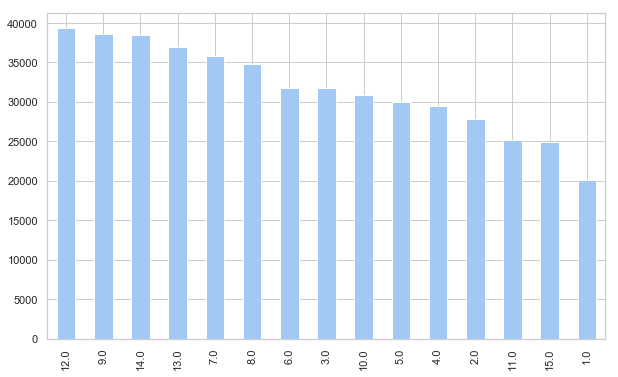

In [105]:
#15 city council districts. Council districts refer to a small local areas in the city.
district_data = data['Council Districts'].value_counts().plot(kind = 'bar')
#we see that district 12 is the council district with the most traffic collisions

In [10]:
#Shows that Date Occurred and Date Reported are the same for all so no discrepency there
mask = data['Date Reported'] == data['Date Occurred']
mask.value_counts()

False    481568
dtype: int64

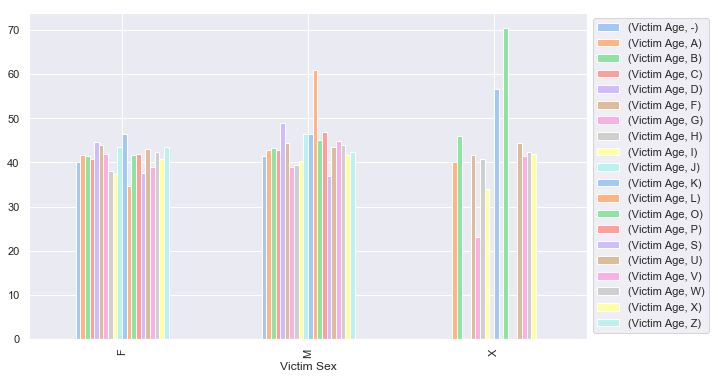

In [129]:
#seeing average age in collisions grouped by sex and descent.
import seaborn as sns
data.groupby(['Victim Sex', 'Victim Descent'])[['Victim Age']].mean().unstack().plot.bar().legend(bbox_to_anchor=(1,1))
#sns.barplot(mask, palette='Blues_d')

In [12]:
dates = pd.date_range(start='7/20/2018', end='7/20/2019', freq='B')
data.index = pd.to_datetime(data['Date Occurred'])
data.loc[dates]

test = data['Time Occurred'].rolling(window=365, min_periods=1).mean()
test[:5]

Date Occurred
2019-07-20    1040.000000
2019-07-20     945.000000
2019-07-20     933.333333
2019-07-20     875.000000
2019-07-20     940.000000
Name: Time Occurred, dtype: float64

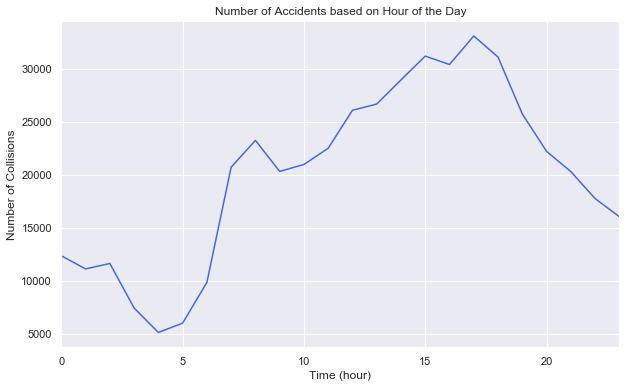

In [182]:
#number of accidents at this time (time on x, # of accidents on y)
data['Time (hour)'] = data['Time Occurred'].floordiv(100)
temp = data.groupby('Time (hour)')['Date Occurred'].count()
temp.plot(color = 'royalblue', title = 'Number of Accidents based on Hour of the Day')
ylabel('Number of Collisions')
show()

Text(0,0.5,'Number of Collisions')

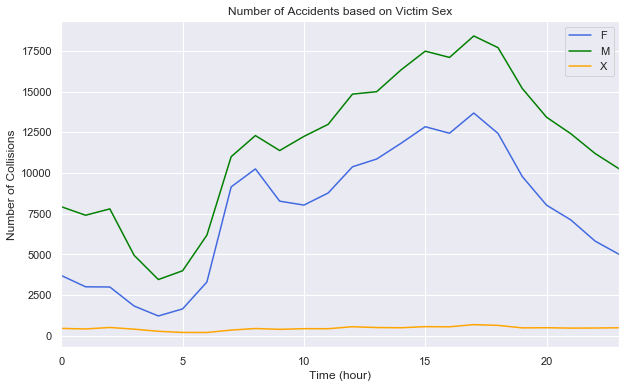

In [180]:
#number of accidents at this time based on Sex (time on x, # of accidents on y)
data['Time (hour)'] = data['Time Occurred'].floordiv(100)
temp = data.groupby(['Time (hour)', 'Victim Sex'])['Date Occurred'].count()
#temp2 = data.groupby('Time (hour)')['Date Occurred'].count()
colours = ['royalblue', 'green', 'orange'][0:len(data['Victim Sex'])]
temp.unstack().plot(color = colours, title = 'Number of Accidents based on Victim Sex').legend(bbox_to_anchor=(1,1))
ylabel('Number of Collisions')
#show()

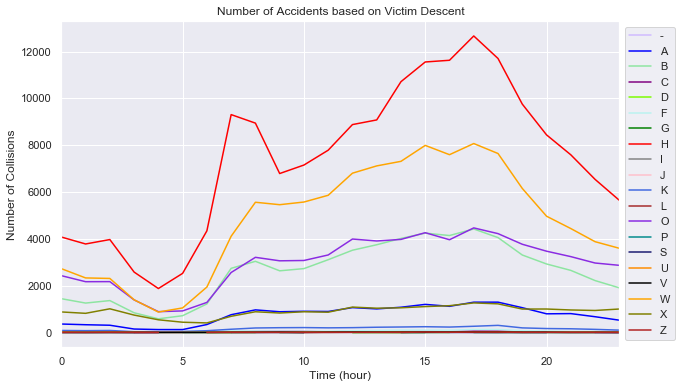

In [174]:
#number of accidents at this time based on Sex (time on x, # of accidents on y)
import seaborn as sns
temp = data.groupby(['Time (hour)', 'Victim Descent'])['Date Occurred'].count()
colours = ['m', 'blue','g','purple','lawngreen','c', 'green','red', '125','pink', 'royalblue', 'brown', 'blueviolet', 'darkcyan', 'midnightblue', 'darkorange', 'black', 'orange', 'olive', 'firebrick' ][0:len(data['Victim Descent'])]
#temp2 = data.groupby('Time (hour)')['Date Occurred'].count()
temp.unstack().plot(color = colours, title = 'Number of Accidents based on Victim Descent').legend(bbox_to_anchor=(1,1))
ylabel('Number of Collisions')
show()

In [16]:
#see if more accidents happen at certain time in certain areas (zip codes or area names)
#Where the most accidents happen at this time
temp = data.groupby(['Time (hour)', 'Area Name'])['Date Occurred'].count()
df = temp.unstack()
df2 = pd.DataFrame()
df2['Number of Collisions'] = df.max(axis=1)
df2['Area Name'] = df.idxmax(axis = 1)
df2

,Number of Collisions,Area Name
Time (hour),,
0,869,Hollywood
1,885,Hollywood
2,1143,Hollywood
3,559,77th Street
4,392,77th Street
5,481,77th Street
6,677,77th Street
7,1421,Southwest
8,1491,Southwest


In [17]:
new = data['Location'].str.split(",", expand=True)
new2 = new[0].str.split(":", expand=True)
data['Latitude'] = new2[1].str.replace("'","").astype(float)
data['Longitude'] = new[5].str.split(":", expand=True)[1].str.replace("'","").str.replace("}","").astype(float)

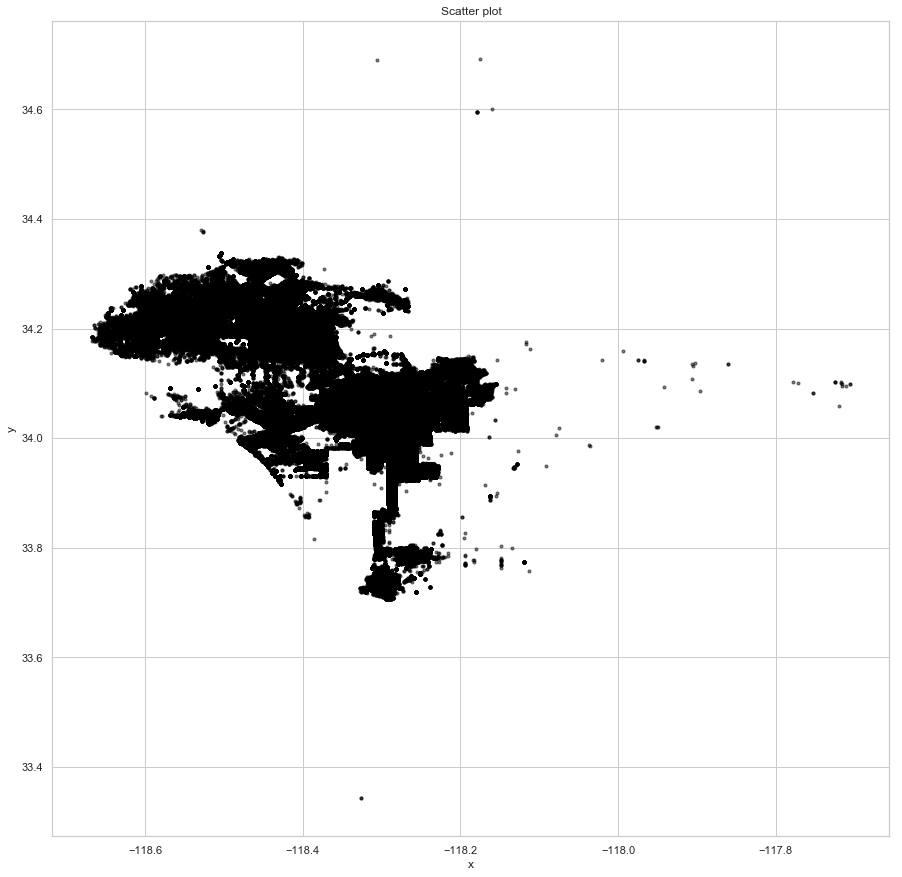

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
traffic_data= data[data['Latitude'] != 0.0]
x=traffic_data['Longitude']
y=traffic_data['Latitude']
colors = ('black')
area = np.pi*3

# Plot
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 720x432 with 0 Axes>

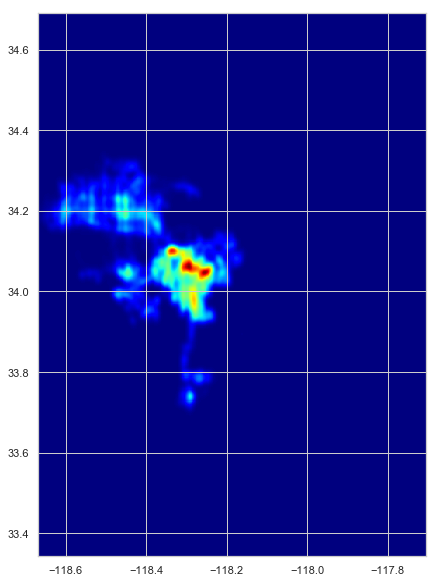

In [101]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

heatmap, xedges, yedges = np.histogram2d(x, y, bins=500)
heatmap = gaussian_filter(heatmap, sigma=3)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

plt.clf()
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap=cm.jet)
plt.show()

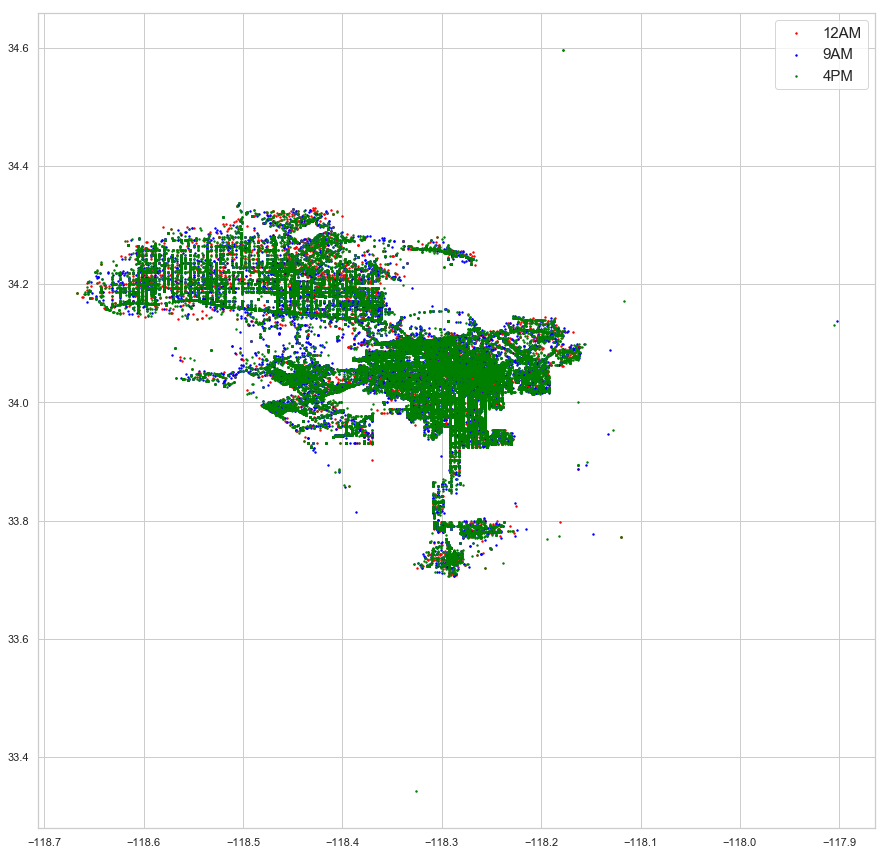

In [78]:
import descartes
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

traffic_data = data[data['Latitude'] != 0.0000]
la_map = gpd.read_file("CA_Counties_TIGER2016.shp")
fig, ax = plt.subplots(figsize = (15,15))
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(traffic_data['Longitude'], traffic_data['Latitude'])]
geo_data = gpd.GeoDataFrame(traffic_data, crs = crs, geometry = geometry)

geo_data[geo_data['Time (hour)'] == 0].plot(ax = ax, markersize = 2, color = 'red', marker = 'o', label = '12AM')
geo_data[geo_data['Time (hour)'] == 9].plot(ax = ax, markersize = 2, color = 'blue', marker = 'o', label = '9AM')
geo_data[geo_data['Time (hour)'] == 16].plot(ax = ax, markersize = 2, color = 'green', marker = 'o', label = '4PM')
plt.legend(prop={'size': 15})